In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
Ts = 501
segments = 12 # beads = 13

In [3]:
fil = []

for i in range(Ts):
    fil_ = pd.read_csv('data5/Filament_5s133R0.5Ts'+str(i)+'.csv', names=['x','y','z'], skiprows=1) 
    fil.append(fil_)

In [4]:
#m1r08_Aglf = pd.read_csv('data05/active5s133R05_aggressive.csv')
#m2r08_Aglf = pd.read_csv('data05/inactive5s133R05_aggressive.csv')

In [5]:
m1r08_Ag_upd = pd.read_csv('data05/all_active5s133R05_label_life.csv')
m2r08_Ag_upd = pd.read_csv('data05/all_inactive5s133R05_label_life.csv')

In [6]:
round(m1r08_Ag_upd['life'].mean(), 0)

13.0

In [7]:
round(m2r08_Ag_upd['life'].mean(), 0)

198.0

In [8]:
m1r08_Ag_upd = m1r08_Ag_upd[m1r08_Ag_upd.life >= 13] # 
m2r08_Ag_upd = m2r08_Ag_upd[m2r08_Ag_upd.life >= 198]

m1r08_Ag_upd = m1r08_Ag_upd.sort_values(['Ts'], ascending=[True])
m2r08_Ag_upd = m2r08_Ag_upd.sort_values(['Ts'], ascending=[True])

m1r08_Ag_u = m1r08_Ag_upd.set_index('Ts')
m2r08_Ag_u = m2r08_Ag_upd.set_index('Ts')

In [9]:
Ag_in_ts_ = []

for i in range(501):
    try:
        Ag_in_ts_.append(len(m2r08_Ag_u.loc[i]))
    except Exception as e:
        print(e)

Ag_in_ts = np.array(Ag_in_ts_)
print('%s: Timestep with the greates no. of defective aggressive motors'%(np.max(Ag_in_ts)))

0
40: Timestep with the greates no. of defective aggressive motors


In [10]:
plt.style.use('ggplot')

#idx = 19
i=0
unplottedA = []
unplottedI = []

while i < Ts:
    for idx in range(i,i+1):
        fig, ax = plt.subplots(figsize=(10,8))

        ax.plot(fil[idx]['x'],fil[idx]['y'], marker='o', color='red', markerfacecolor='None', linestyle='-', linewidth=2, label='Actin')
        ax.scatter(fil[idx]['x'][0],fil[idx]['y'][0], marker='D', color='black', label='Leading tip')
        try:
            ax.scatter(m1r08_Ag_u.loc[idx]['x'], m1r08_Ag_u.loc[idx]['y'], marker='o', color='lightgreen', label='Active')
        except Exception as e:
            unplottedA.append(e)
        try:
            ax.scatter(m2r08_Ag_u.loc[idx]['x'], m2r08_Ag_u.loc[idx]['y'], marker='o', color='blue', label='Defective') # aggressive
        except Exception as e:
            unplottedI.append(e)
        ax.set_xticks(np.arange(0.4,6.1,0.4))
        ax.set_yticks(np.arange(-2.0,2.4,0.4))
        
        ax.minorticks_on()
        ax.tick_params('both', direction='in', top=True, right=True, length=9, width=0.5, which='major') #
        ax.tick_params('both', direction='in', top=True, right=True, length=4, width=0.4, which='minor') #

        ax.set_xlabel('X ($\mu m$)', fontsize=15) #
        ax.set_ylabel('Y ($\mu m$)', fontsize=15) #
        
        ax.text(0.95,-0.06,'@NittaLab', color='grey', horizontalalignment ='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_aspect('equal') #
        ax.legend(loc = 'upper left')

        if i <10:
            ax.set_title('R = 0.5 | Def. life $\geq$ 1.98 sec | Act. life $\geq$ 0.13 sec | Ts: 00%s'%i, fontsize=16) # > mean
            plt.savefig('figInAcAg/'+'00'+str(i)+'.png', fmt='.png', dpi=500, bbox_inches='tight')
        if i >9 and i <100:
            ax.set_title('R = 0.5 | Def. life $\geq$ 1.98 sec | Act. life $\geq$ 0.13 sec | Ts: 0%s'%i, fontsize=16) # > mean
            plt.savefig('figInAcAg/'+'0'+str(i)+'.png', fmt='.png', dpi=500, bbox_inches='tight')
        if i >99 and i < Ts:
            ax.set_title('R = 0.5 | Def. life $\geq$ 1.98 sec | Act. life $\geq$ 0.13 sec | Ts: %s'%i, fontsize=16) # > mean
            plt.savefig('figInAcAg/'+str(i)+'.png', fmt='.png', dpi=500, bbox_inches='tight')

        plt.close()
    i+=1

#plt.show()
plt.close()

In [11]:
import cv2
import time
import glob

fRate = 15
start = 0
dx = 50

for film in range(10):
    movieName = 'figInAcAg/DefectiveActiveAggressiveTs'+str(start)+'_'+str(start+dx)+'.avi'

    frames = []
    images = glob.glob('figInAcAg/*.png')
    images = sorted(images, key=lambda x:x[-7:])
    images = images[start:start+dx]

    for i in images:
        frame = cv2.imread(i)#; print(i)
        H, W, layers = frame.shape
        size = (W,H)
        frames.append(frame)

    out = cv2.VideoWriter(movieName,cv2.VideoWriter_fourcc(*'DIVX'),fRate,size)

    for j in range(len(frames)):
        out.write(frames[j])
    out.release()
    start+=dx
    time.sleep(15)

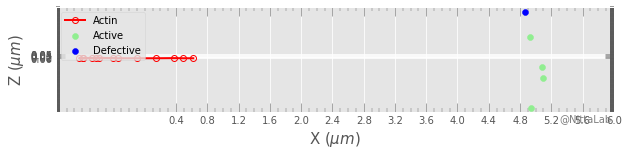

In [17]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,8))
#fil[idx]['y']
ax.plot(fil[idx]['y'],fil[idx]['z'], marker='o', color='red', markerfacecolor='None', linestyle='-', linewidth=2, label='Actin')
#ax.scatter(fil[idx]['x'][0],[0], marker='D', color='black', label='Leading tip')
try:
    ax.scatter(m1r08_Ag_u.loc[idx]['x'], m1r08_Ag_u.loc[idx]['y'], marker='o', color='lightgreen', label='Active')
except Exception as e:
    unplottedA.append(e)
try:
    ax.scatter(m2r08_Ag_u.loc[idx]['x'], m2r08_Ag_u.loc[idx]['y'], marker='o', color='blue', label='Defective') # aggressive
except Exception as e:
    unplottedI.append(e)
ax.set_xticks(np.arange(0.4,6.1,0.4))
ax.set_yticks(np.arange(0.0,0.06,0.01))

ax.minorticks_on()
ax.tick_params('both', direction='in', top=True, right=True, length=9, width=0.5, which='major') #
ax.tick_params('both', direction='in', top=True, right=True, length=4, width=0.4, which='minor') #

ax.set_xlabel('X ($\mu m$)', fontsize=15) #
ax.set_ylabel('Z ($\mu m$)', fontsize=15) #

ax.text(0.95,-0.06,'@NittaLab', color='grey', horizontalalignment ='center', verticalalignment='center', transform=ax.transAxes)
ax.set_aspect('equal') #
ax.legend(loc = 'upper left')

plt.show()

In [10]:
plt.style.use('ggplot')

#idx = 19
i=0
unplottedA = []
unplottedI = []

while i < Ts:
    for idx in range(i,i+1):
        fig = plt.figure(figsize=plt.figaspect(0.5)*1.5)
        ax = fig.gca(projection='3d')
        # figaspect(0.5) makes the figure twice as wide as it is tall
        # *1.5 increases the size of the figure

        ax.plot(fil[idx]['x'],fil[idx]['y'],fil[idx]['z'], marker='o', color='red', markerfacecolor='None', linestyle='-', linewidth=2, label='Actin')
        ax.scatter(fil[idx]['x'][0],fil[idx]['y'][0],fil[idx]['z'][0], marker='D', color='black', label='Leading tip')
        #try:
            #ax.scatter(m1r08_Ag_u.loc[idx]['x'], m1r08_Ag_u.loc[idx]['y'], marker='o', color='lightgreen', alpha=0.5, label='Active')
        #except Exception as e:
            #unplottedA.append(e)
        try:
            ax.scatter(m2r08_Ag_u.loc[idx]['x'], m2r08_Ag_u.loc[idx]['y'], marker='o', color='blue', label='Defective') # aggressive
        except Exception as e:
            unplottedI.append(e)
        ax.set_xticks(np.arange(0.4,6.1,0.4))
        ax.set_yticks(np.arange(-2.0,2.4,0.4))
        ax.set_zticks(np.arange(0.0,0.061,0.02))

        ax.minorticks_on()
        ax.tick_params('both', direction='in', top=True, right=True, length=9, width=0.5, which='major') #
        ax.tick_params('both', direction='in', top=True, right=True, length=4, width=0.4, which='minor') #

        ax.set_xlabel('X ($\mu m$)', fontsize=15) #
        ax.set_ylabel('Y ($\mu m$)', fontsize=15) #

        if i <10:
            #ax.set_title('R = 0.8 | Def. life $\geq$ 0.04 sec | Act. life $\geq$ 0.00 sec | Ts: 00%s'%i, fontsize=16) # > mean
            plt.savefig('figInAcAg/'+'00'+str(i)+'.png', fmt='.png', dpi=500, bbox_inches='tight')
        if i >9 and i <100:
            #ax.set_title('R = 0.8 | Def. life $\geq$ 0.04 sec | Act. life $\geq$ 0.00 sec | Ts: 0%s'%i, fontsize=16) # > mean
            plt.savefig('figInAcAg/'+'0'+str(i)+'.png', fmt='.png', dpi=500, bbox_inches='tight')
        if i >99 and i < Ts:
            #ax.set_title('R = 0.8 | Def. life $\geq$ 0.04 sec | Act. life $\geq$ 0.00 sec | Ts: %s'%i, fontsize=16) # > mean
            plt.savefig('figInAcAg/'+str(i)+'.png', fmt='.png', dpi=500, bbox_inches='tight')

        plt.close()
    i+=1

#plt.show()
plt.close()

#================================================================================

import cv2
import time
import glob

fRate = 15
start = 0
dx = 50

for film in range(10):
    movieName = 'figInAcAg/DefectiveActiveAggressiveTs'+str(start)+'_'+str(start+dx)+'.avi'

    frames = []
    images = glob.glob('figInAcAg/*.png')
    images = sorted(images, key=lambda x:x[-7:])
    images = images[start:start+dx]

    for i in images:
        frame = cv2.imread(i)#; print(i)
        H, W, layers = frame.shape
        size = (W,H)
        frames.append(frame)

    out = cv2.VideoWriter(movieName,cv2.VideoWriter_fourcc(*'DIVX'),fRate,size)

    for j in range(len(frames)):
        out.write(frames[j])
    out.release()
    start+=dx
    time.sleep(15)